In [1]:
!pip install folium
import folium
import requests
import pandas as pd

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
m = folium.Map(location=[ 41.14961,  -8.61099], zoom_start=14,tiles="Stamen Terrain",)

In [3]:

req_params = {
    'f': 'json',
    'where': "1=1",                        # 'where' clause is mandatory it takes a postgres-like query
    #'where': "n_o > 10",                  # example where the number of reports event was over 10
    #'where': "freguesia = 'Bonfim'",      # example for all the reports in 'Bonfim'
    #'where': "ano > 2000",                # Caveat: For example in this dataset, this will not work as 'ano' is defined as "esriFieldTypeString"
    'returnGeometry': 'true',
    'outFields': '*',                      # the fields that you want returned
    'orderByFields': 'objectid ASC', 
    #'resultOffset': '4000',
    #'resultRecordCount': '1000',
    'outSR': '4326',
    #'token': str(TOKEN) 
}
  

In [167]:
df = pd.read_csv("quality_measure.csv", sep="\t")
df

,Unnamed: 0,0,1,QOL
0,0,41.14000,-8.61950,0.121291
1,1,41.14000,-8.61875,0.116315
2,2,41.14000,-8.61800,0.109869
3,3,41.14000,-8.61725,0.100319
4,4,41.14000,-8.61650,0.101587
5,5,41.14000,-8.61575,0.105703
6,6,41.14000,-8.61500,0.113815
7,7,41.14000,-8.61425,0.125842
8,8,41.14000,-8.61350,0.139339
9,9,41.14000,-8.61275,0.152895


In [5]:
url = 'https://servsig.cm-porto.pt/arcgis/rest/services/OpenData_APD/OpenData_APD/MapServer/63/query'
r = requests.get(url, params = req_params)
data = r.json()

#for myItem in data["features"]:
#    myItemAttributes = myItem["attributes"]
#    popup = "<b>Agrupamento:</b> "+myItem["attributes"]["agr"]+"</br><b>Designação:</b>"+myItem["attributes"]["designacao"]
#    folium.Marker( location=[ myItem["geometry"]["y"], myItem["geometry"]["x"] ],
#                  popup=popup,icon=folium.Icon(color='red',icon='graduation-cap ', prefix='fa')).add_to( m )


In [ ]:
from itertools import product

stepsize = 0.001
lonmin, lonmax = 41.14, 41.19
latmin, latmax = -8.69, -8.555
ys = np.arange(lonmin, lonmax, stepsize)
xs = np.arange(latmin, latmax, stepsize)
grid = list(product(ys, xs))

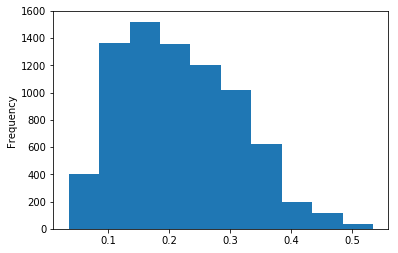

In [168]:
df["QOL"].plot(kind="hist")

In [174]:
df["QOL"].max()

0.53374618183776845

In [124]:
import json
with open('porto_polygon', 'r') as content_file:
    data = json.load(content_file)
lons_vect = [point[0] for point in data["geometry"]["coordinates"][0]]
lats_vect = [point[1] for point in data["geometry"]["coordinates"][0]]

In [143]:
!pip install shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
lons_lats_vect = np.column_stack((lons_vect, lats_vect)) # Reshape coordinates
polygon = Polygon(lons_lats_vect) # create polygon

def point_in_porto(long, lat):
    point = Point(lat,long) # create point
    return point.within(polygon) # check if a point is in the polygon 

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [200]:
import numpy as np

heat = [[long, lat, QOL*10] for long, lat, QOL in zip(df["0"], df["1"], df["QOL"]) if point_in_porto(long,lat)]

from folium import plugins
m = folium.Map(location=[ 41.14961,  -8.61099], zoom_start=14,tiles="Stamen Terrain")
m.add_children(plugins.HeatMap(heat, 
                               radius=15, 
  #                             min_opacity = 0.5,
                               max_zoom=18,
                               max_val=1,
                               blur=30))
#                               gradient = {
#                                   0.1:'#59FF19',
#                                   0.15:'#80FF18',
#                                   0.20:'#A7FF16',
#                                   0.25:'#CFFF15',
#                                   0.30:'#F8FF13',
#                                   0.35:'#FFDB11',
#                                   0.40:'#FFB210',
#                                   0.45:'#FF870E',
#                                   0.50:'#FF5C0D',
#                                   0.55:'#FF310B',
#                                   0.6:'#FF090F'
#                               }))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


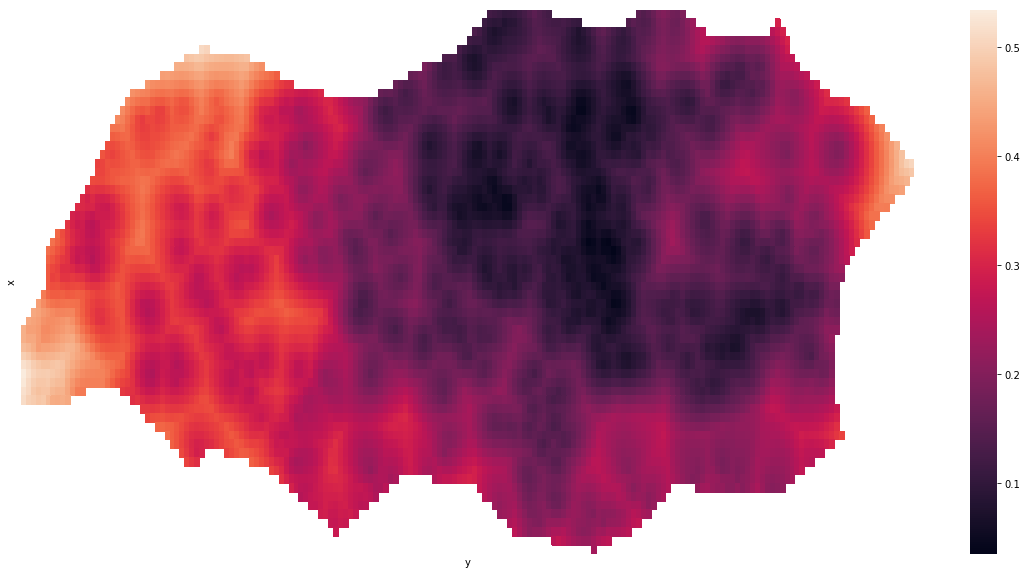

In [224]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import numpy as np
x, y, z = list(df["0"]), list(df["1"]), list(df["QOL"])

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches

flatui = ["#59FF19", "#80FF18", "#A7FF16", "#CFFF15", "#F8FF13", 
          "#FFDB11","#FFB210", "#FF870E", "#FF5C0D", "#FF310B", "#FF090F"]
sns.set_palette(flatui)

data = pd.DataFrame(data={'x':x, 'y':y, 'z':z})
data = data.pivot(index='x', columns='y', values='z')
sns.heatmap(data, xticklabels=False, yticklabels=False,ax=ax )
plt.savefig('foo.png')
